# STEP 1 : LOAD THE DATA SET OF TITANIC

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("tested.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [22]:
print(" The daataset shape :", df.shape)
print("\n the first 5 Rows :\n", df.head())
print("\n the data set info:\n")
df.info()
print("\n i  last the summary statistics:\n", df.describe())

 The daataset shape : (418, 11)

 the first 5 Rows :
    PassengerId  Survived  Pclass  \
0          892         0       3   
1          893         1       3   
2          894         0       2   
3          895         0       3   
4          896         1       3   

                                           Name     Sex   Age  SibSp  Parch  \
0                              Kelly, Mr. James    male  34.5      0      0   
1              Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                     Myles, Mr. Thomas Francis    male  62.0      0      0   
3                              Wirz, Mr. Albert    male  27.0      0      0   
4  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   

    Ticket     Fare Embarked  
0   330911   7.8292        Q  
1   363272   7.0000        S  
2   240276   9.6875        Q  
3   315154   8.6625        S  
4  3101298  12.2875        S  

 the data set info:

<class 'pandas.core.frame.DataFrame'>
RangeInd

# Step 2: Data Cleaning 
### 1. Handle missing values using imputation techniques or removal.
### 2. Remove duplicates.
### 3. Identify and manage outliers using statistical methods or visualizations.


In [23]:
print("the Missing Values:\n", df.isnull().sum())

the Missing Values:
 PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


* Impute 'Age' with median (robust to outliers)
* Impute 'Fare' with median (only 1 missing value)
* 'Cabin' has too many missing values, drop the column*


In [26]:
df['Age'].fillna(df['Age'].median(), inplace=True)

df['Fare'].fillna(df['Fare'].median(), inplace=True)

df.drop(columns=['Cabin'], inplace=True)

# Verify missing values
print("\nMissing Values After Imputation:\n", df.isnull().sum())

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_20108\4012257463.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_20108\4012257463.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For

KeyError: "['Cabin'] not found in axis"

In [28]:
# 2.2 Remove Duplicates
print("Number of Duplicates:", df.duplicated().sum())
df.drop_duplicates(inplace=True)
print("Dataset Shape After Removing Duplicates:", df.shape)

Number of Duplicates: 0
Dataset Shape After Removing Duplicates: (418, 11)


### 2.3 Identify and Manage Outliers


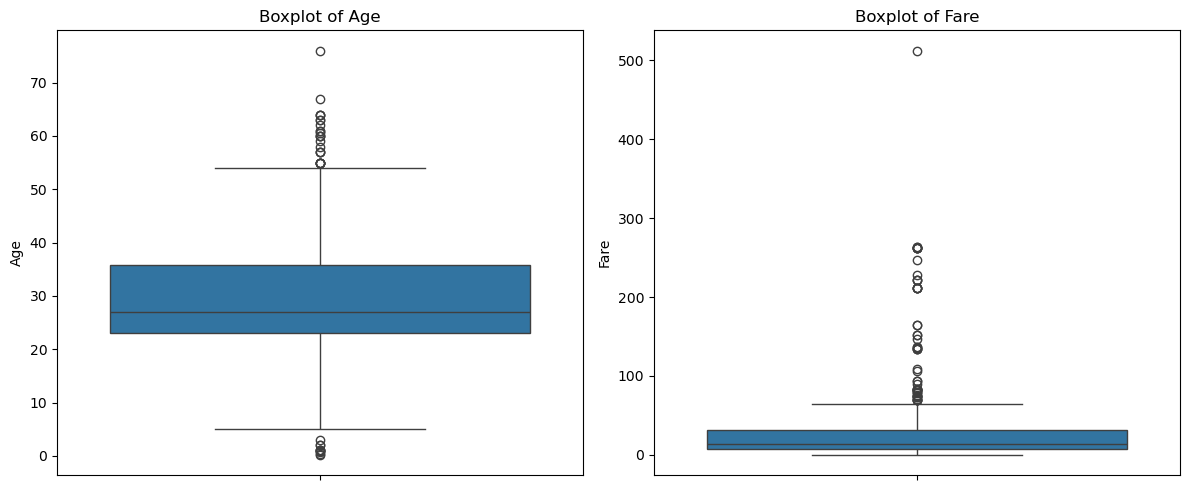

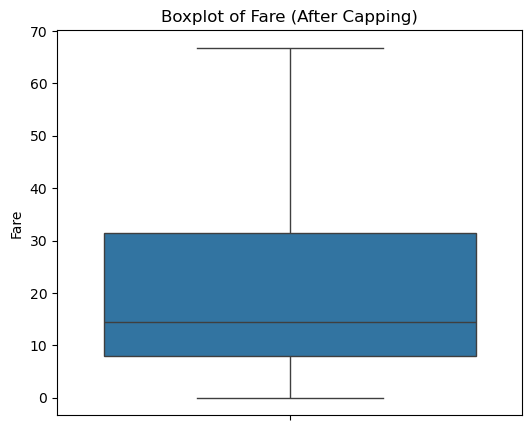

In [15]:
plt.figure(figsize=(12, 5))

# Boxplot for 'Age'
plt.subplot(1, 2, 1)
sns.boxplot(y=df['Age'])
plt.title('Boxplot of Age')

# Boxplot for 'Fare'
plt.subplot(1, 2, 2)
sns.boxplot(y=df['Fare'])
plt.title('Boxplot of Fare')

plt.tight_layout()
plt.show()

# Cap 'Fare' outliers using IQR method
Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df['Fare'] = df['Fare'].clip(lower=lower_bound, upper=upper_bound)

# Verify 'Fare' after capping
plt.figure(figsize=(6, 5))
sns.boxplot(y=df['Fare'])
plt.title('Boxplot of Fare (After Capping)')
plt.show()

#  Step 03 : Visualizations


### 3.1 Create bar charts for categorical variables.

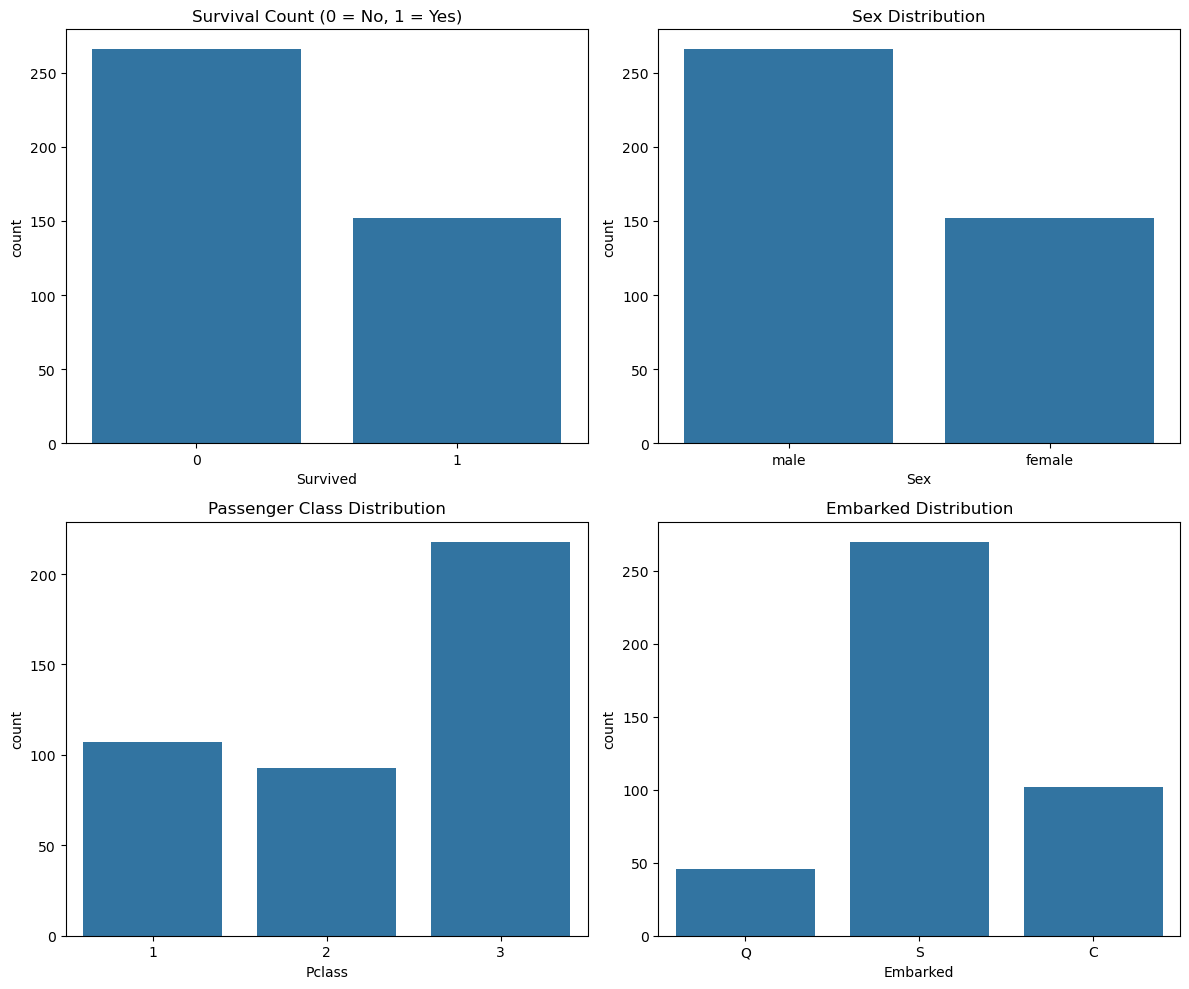

In [16]:
plt.figure(figsize=(12, 10))

# Survived
plt.subplot(2, 2, 1)
sns.countplot(x='Survived', data=df)
plt.title('Survival Count (0 = No, 1 = Yes)')

# Sex
plt.subplot(2, 2, 2)
sns.countplot(x='Sex', data=df)
plt.title('Sex Distribution')

# Pclass
plt.subplot(2, 2, 3)
sns.countplot(x='Pclass', data=df)
plt.title('Passenger Class Distribution')

# Embarked
plt.subplot(2, 2, 4)
sns.countplot(x='Embarked', data=df)
plt.title('Embarked Distribution')

plt.tight_layout()
plt.show()

### 3.2 Histograms for Numeric Distributions

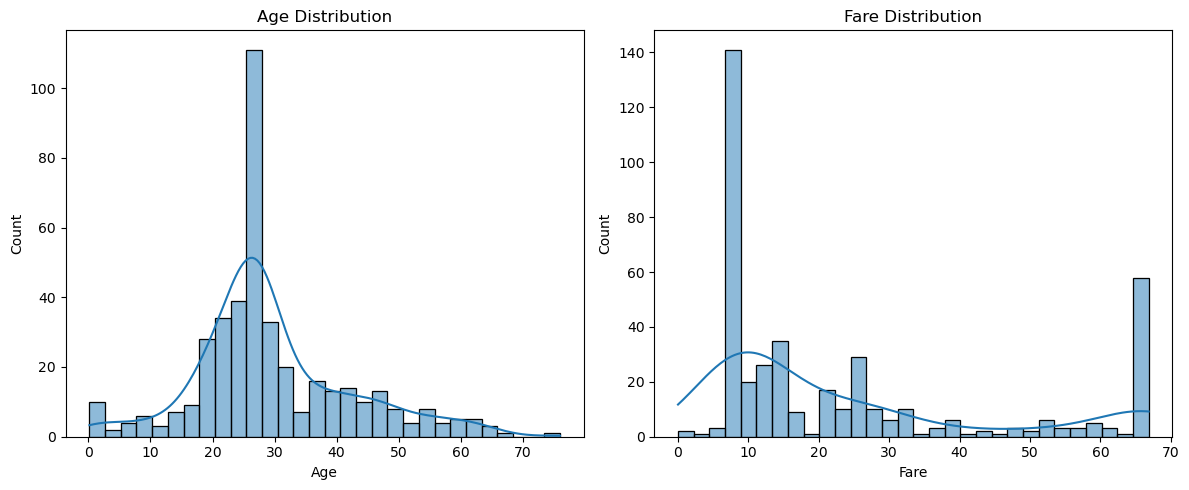

In [18]:
plt.figure(figsize=(12, 5))

# Age
plt.subplot(1, 2, 1)
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Age Distribution')

# Fare
plt.subplot(1, 2, 2)
sns.histplot(df['Fare'], bins=30, kde=True)
plt.title('Fare Distribution')

plt.tight_layout()
plt.show()

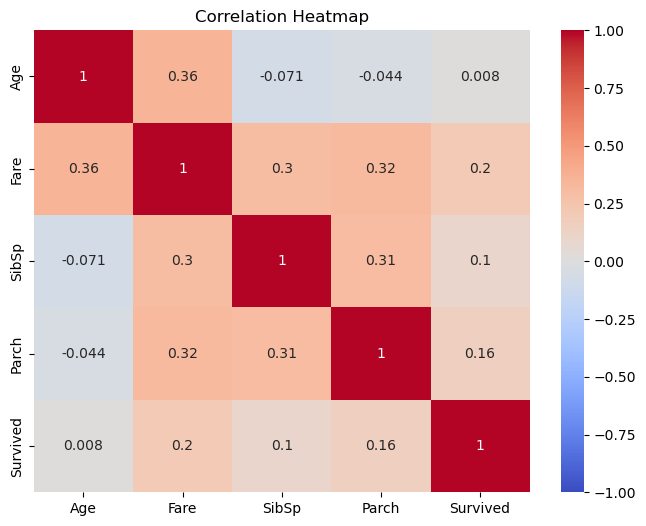

In [20]:
# 3.3 Correlation Heatmap for Numeric Features
plt.figure(figsize=(8, 6))
numeric_cols = ['Age', 'Fare', 'SibSp', 'Parch', 'Survived']
corr_matrix = df[numeric_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()



# Summarize insights 

In [21]:
print("\n=== EDA Insights ===")
print("1. **Dataset Overview**: The Titanic test dataset has {} rows and {} columns after cleaning.".format(df.shape[0], df.shape[1]))
print("2. **Missing Values**: Handled missing 'Age' (imputed with median), 'Fare' (imputed with median), and dropped 'Cabin' due to excessive missing values.")
print("3. **Duplicates**: No duplicates found.")
print("4. **Outliers**: Capped 'Fare' outliers using the IQR method; 'Age' had minimal outliers.")
print("5. **Categorical Insights**:")
print("   - Survival rate: ~{:.2f}% survived.".format(df['Survived'].mean() * 100))
print("   - Sex: More males than females.")
print("   - Pclass: Majority in 3rd class.")
print("   - Embarked: Most passengers embarked from Southampton (S).")
print("6. **Numerical Insights**:")
print("   - Age: Slightly right-skewed, most passengers between 20-40 years.")
print("   - Fare: Right-skewed, even after capping outliers.")
print("7. **Correlations**:")
print("   - Weak correlations overall; 'Fare' and 'Pclass' may show some relationship (higher fares in 1st class).")
print("   - 'SibSp' and 'Parch' have a moderate positive correlation.")


=== EDA Insights ===
1. **Dataset Overview**: The Titanic test dataset has 418 rows and 11 columns after cleaning.
2. **Missing Values**: Handled missing 'Age' (imputed with median), 'Fare' (imputed with median), and dropped 'Cabin' due to excessive missing values.
3. **Duplicates**: No duplicates found.
4. **Outliers**: Capped 'Fare' outliers using the IQR method; 'Age' had minimal outliers.
5. **Categorical Insights**:
   - Survival rate: ~36.36% survived.
   - Sex: More males than females.
   - Pclass: Majority in 3rd class.
   - Embarked: Most passengers embarked from Southampton (S).
6. **Numerical Insights**:
   - Age: Slightly right-skewed, most passengers between 20-40 years.
   - Fare: Right-skewed, even after capping outliers.
7. **Correlations**:
   - Weak correlations overall; 'Fare' and 'Pclass' may show some relationship (higher fares in 1st class).
   - 'SibSp' and 'Parch' have a moderate positive correlation.
